### 2.11

In [32]:
set.seed(123) # 设置随机种子
x = rnorm(n=100,mean=5,sd=1) # 生成随机数
theta = exp(5)
print(sprintf('参数真实值为：%0.2f ',theta))

# 用枢轴量方法获得参数的0.95置信区间和标准差
alpha = 0.05
n = length(x)
sigma = 1
meanx = mean(x)
u1 = qnorm(1-alpha/2,0,1)
u2 = qnorm(1-alpha,0,1)
mu1 = meanx - u1*sigma/sqrt(n)
mu2 = meanx + u1*sigma/sqrt(n)
mu1 = exp(mu1)
mu2 = exp(mu2)
print(sprintf('枢轴量方法的置信区间：(%0.2f , %0.2f)',mu1,mu2))

sd = sigma/sqrt(n)
print(sprintf('枢轴量方法的标准差：%0.2f ',sd))

[1] "参数真实值为：148.41 "
[1] "枢轴量方法的置信区间：(133.54 , 197.63)"
[1] "枢轴量方法的标准差：0.10 "


[1] "参数Bootstrap方法的置信区间：(147.29 , 201.98)"
[1] "参数Bootstrap方法的标准差：14.26 "


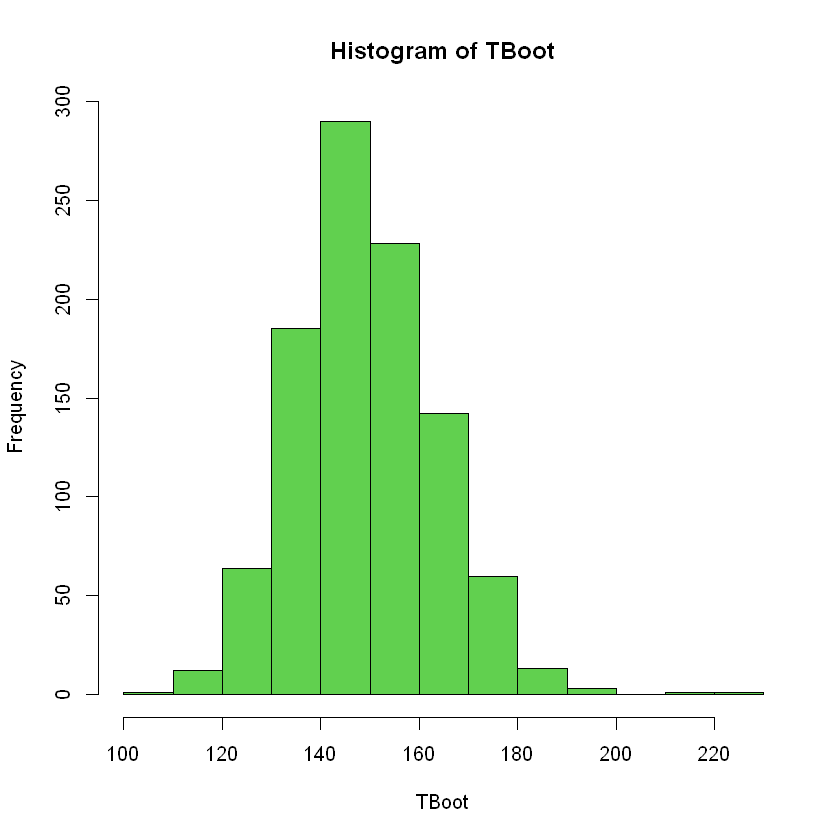

In [33]:
# 用参数Bootstrap方法获得参数的0.95置信区间和标准差
TBoot = NULL
B = 1000 # 次数
SD.x = NULL
for (i in 1:B){ 
    Xsample = rnorm(n=100,mean=5,sd=1) # 这个地方难以从整体上固定随机种子
    Tboot = exp(mean(Xsample))
    TBoot = c(TBoot,Tboot)
    SD.x = c(SD.x,sd(TBoot))
}
SD.theta.x = sd(TBoot)
# plot(1:B,SD.x,col = 4)
hist(TBoot, col = 3) 

x.theta = exp(mean(x))
low1 = 2*x.theta-quantile(TBoot,1-alpha/2) # 枢轴量方法
up1 = 2*x.theta-quantile(TBoot,alpha/2)
print(sprintf('参数Bootstrap方法的置信区间：(%0.2f , %0.2f)',low1,up1))

sd1 = sd(TBoot)
print(sprintf('参数Bootstrap方法的标准差：%0.2f ',sd1))

[1] "非参数Bootstrap方法的置信区间：(42.65 , 231.92)"
[1] "非参数Bootstrap方法的标准差：48.05 "


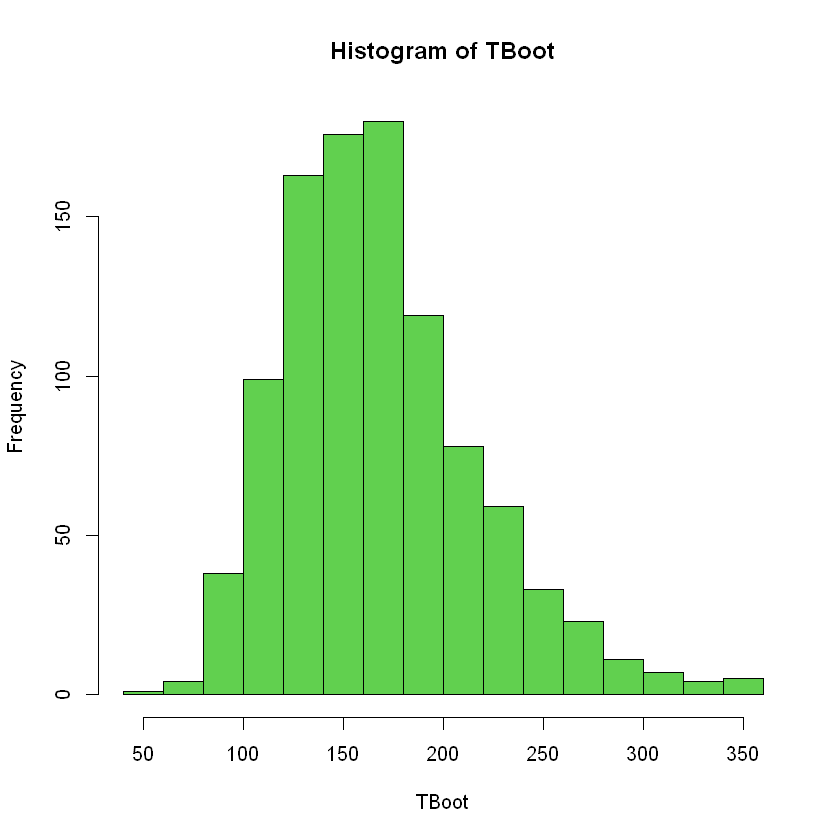

In [34]:
# 用非参数Bootstrap方法获得参数的0.95置信区间和标准差
TBoot = NULL
n = 10 # 每次bootstrap的样本量
B = 1000 # 次数
SD.x = NULL
for (i in 1:B){
    Xsample = sample(x, n, T)
    Tboot = exp(mean(Xsample))
    TBoot = c(TBoot,Tboot)
    SD.x = c(SD.x,sd(TBoot))
}
SD.theta.x = sd(TBoot)
# plot(1:B,SD.x,col = 4) 
hist(TBoot, col = 3)

low2 = 2*x.theta-quantile(TBoot,1-alpha/2)
up2 = 2*x.theta-quantile(TBoot,alpha/2)
print(sprintf('非参数Bootstrap方法的置信区间：(%0.2f , %0.2f)',low2,up2))

sd2 = sd(TBoot)
print(sprintf('非参数Bootstrap方法的标准差：%0.2f ',sd2))

结论：

使用参数Bootstrap方法得到的标准差较小，因为这种方法假设总体分布已知，能够利用分布的信息，但是非参数的方法只能利用数据本身的信息，因而在相同的置信水平下，使用参数方法得到的置信区间更小，也就是精度更高。根据绘制出的直方图可以看到，参数theta大致服从正态分布，略微右偏。

### 2.12

In [46]:
x = c(64,65,65,66,67,68,68,68,68,69,69,69,70,70,70,70,71,71,71,71,71,72,72,72,73,73,73,75,77,77,77,77,77,77,78,83)
TBoot = NULL
n = 10 # 每次bootstrap的样本量
B = 1000 # 次数
SD.x = NULL
alpha = 0.01
for (i in 1:B){
    Xsample = sample(x, n, T)
    Tboot = mean(Xsample)
    TBoot = c(TBoot,Tboot)
    SD.x = c(SD.x,sd(TBoot))
}
SD.theta.x = sd(TBoot)
x.median = median(x)
low = 2*x.median-quantile(TBoot,1-alpha/2)
up = 2*x.median-quantile(TBoot,alpha/2)
print(sprintf('非参数Bootstrap方法的99置信区间：(%0.2f , %0.2f)',low,up))

[1] "非参数Bootstrap方法的99置信区间：(66.80 , 73.80)"


结论：

使用枢轴量的非参数Bootstrap方法，有99%的把握认为12岁的这种鱼的长度的中位数在66.8到73.8之间。因此，可以基本同意中位数总是在69~72之间的结论。

### 2.13

In [66]:
data = rbind(c(4.7,5.2,6.2,5.1),c(5.0,5.4,6.7,5.7),c(5.7,5.3,6.9,5.7),c(5.4,6.5,7.4,5.9))
# ks正态分布检验
mu = apply(data,1,mean)
x = as.vector(data-mu) # 实验误差
ks.test(x,pnorm)

# 随机游程检验
library(tseries)
x = ifelse(x > 0, 1, 0)
runs.test(factor(x))

Warning message in ks.test(x, pnorm):
"ties should not be present for the Kolmogorov-Smirnov test"



	One-sample Kolmogorov-Smirnov test

data:  x
D = 0.1875, p-value = 0.6272
alternative hypothesis: two-sided



	Runs Test

data:  factor(x)
Standard Normal = -2.9708, p-value = 0.00297
alternative hypothesis: two.sided


结论：

ks正态分布检验：p值大于0.05，不能拒绝原假设，认为实验测验误差为正态分布。

随机游程检验：p值小于0.05，拒绝原假设，认为误差数据是否大于零有顺序随机性。

### 2.14

In [67]:
# 卡方拟合优度检验，是否为均匀分布
x = c(495,503,491,581)
chisq.test(x,p=c(1,1,1,1)/4)
# p值小于0.05，拒绝原假设，认为确诊病人数在季节范围内不服从均匀分布，即发病率与季节有关。


	Chi-squared test for given probabilities

data:  x
X-squared = 10.533, df = 3, p-value = 0.01454


### 2.8

In [21]:
# 给出p分位数的bootstrap置信区间求解程序
bootquan = function(dta, p = 0.5, alpha = 0.05){

    # 使用bootstrap方法对中位数进行重抽样
    TBoot = NULL
    n = 10 # 每次bootstrap的样本量
    B = 1000 # 次数
    SD.dta = NULL
    for (i in 1:B){
        Xsample = sample(dta, n, T)
        Tboot = quantile(Xsample,p)
        TBoot = c(TBoot,Tboot)
        SD.dta = c(SD.dta,sd(TBoot))
    }
    SD.quantile.dta = sd(TBoot)
    dta.quantile = quantile(dta,p)
    low2 = dta.quantile+qnorm(alpha/2,0,1)* SD.quantile.dta
    up2 = dta.quantile-qnorm(alpha/2,0,1)* SD.quantile.dta

    # 枢轴量置信区间估计
    low3 = 2*dta.quantile-quantile(TBoot,1-alpha/2)
    up3 = 2*dta.quantile-quantile(TBoot,alpha/2)

    # 分位数置信区间估计
    low4 = quantile(TBoot,alpha/2)
    up4 = quantile(TBoot,1-alpha/2)

    # 结果汇总
    print(sprintf('| 真实的分位数 |    %0.2f    |',dta.quantile))
    print(sprintf('| 重采样正态法 |(%0.2f, %0.2f)|',low2,up2))
    print(sprintf('| 重采样枢轴量 |(%0.2f, %0.2f)|',low3,up3))
    print(sprintf('| 重采样分位数 |(%0.2f, %0.2f)|',low4,up4))
}

data = scan('.//各章数据//第2章//nerve.txt') # 读入数据
bootquan(data,p=0.75)

[1] "| 真实的分位数 |    0.30    |"
[1] "| 重采样正态法 |(0.09, 0.51)|"
[1] "| 重采样枢轴量 |(0.07, 0.48)|"
[1] "| 重采样分位数 |(0.12, 0.53)|"


In [22]:
bootquan(data,p=0.25)

[1] "| 真实的分位数 |    0.07    |"
[1] "| 重采样正态法 |(-0.01, 0.15)|"
[1] "| 重采样枢轴量 |(-0.04, 0.11)|"
[1] "| 重采样分位数 |(0.03, 0.18)|"


### 2.9

In [6]:
y = c(576,635,558,578,666,580,555,661,651,605,653,575,545,572,594)
z = c(3.39,3.30,2.81,3.03,3.44,3.07,3.00,3.43,3.36,3.13,3.12,2.74,2.76,2.88,3.96)
r = cor(y,z)
print(r) # 相关系数

[1] 0.5459189


[1] "相关系数的标准误差：0.25"
[1] "95枢轴量置信区间：(0.12 , 1.00)"


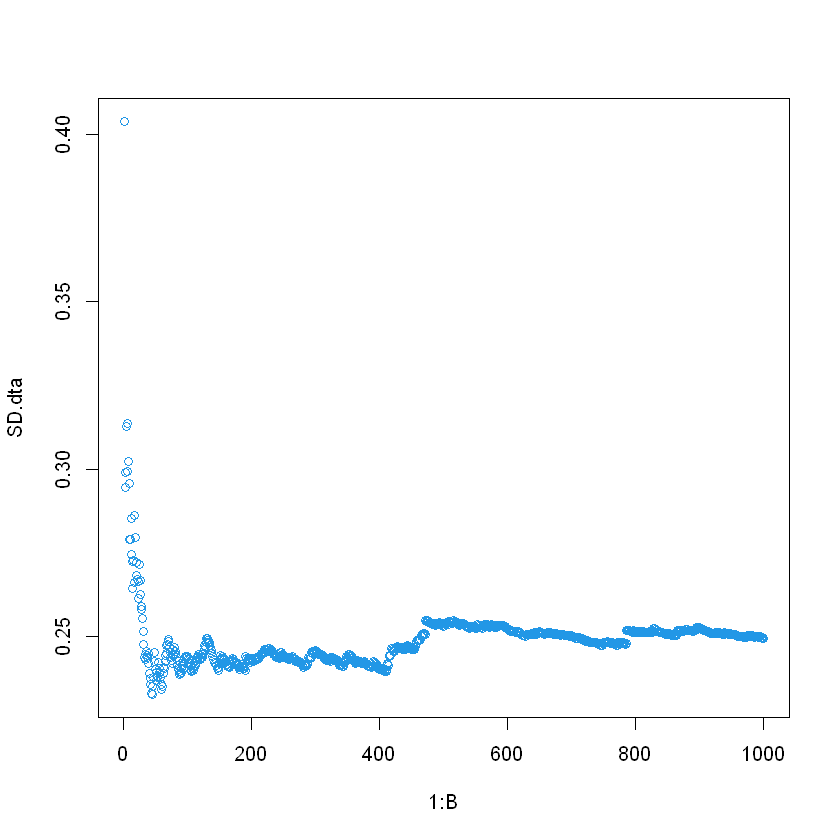

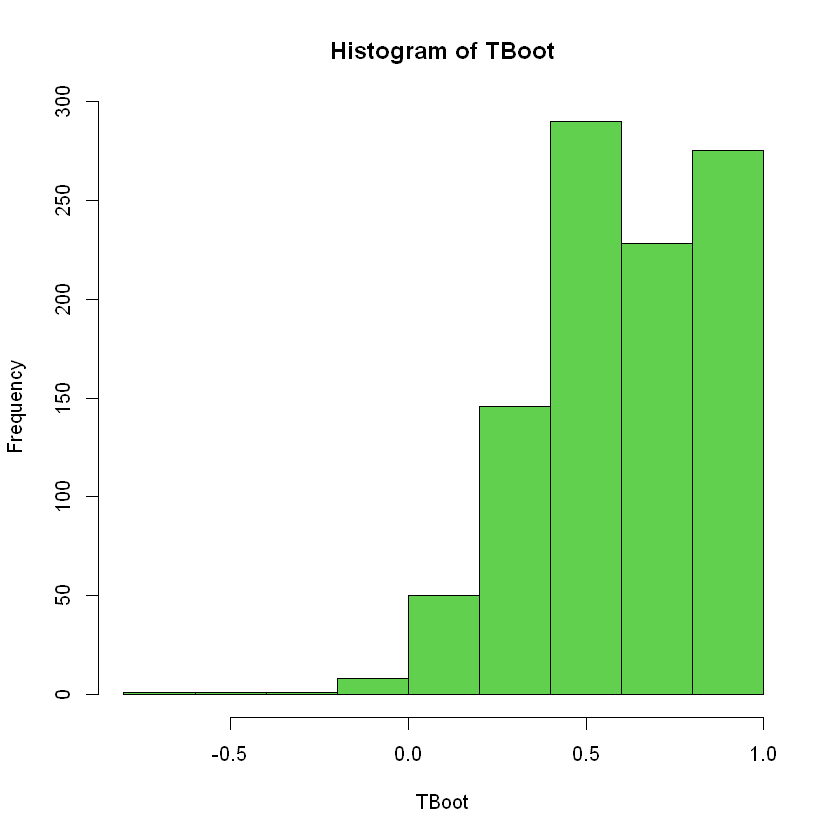

In [30]:
# 使用bootstrap的方法估计相关系数的标准误差和95%置信区间
x = cbind(y,z)
TBoot = NULL
n = 10 # 每次bootstrap的样本量
B = 1000 # 次数
alpha = 0.05
nn = length(y)
SD.dta = NULL
for (i in 1:B){
    Xs = sample(seq(1:nn), n, T)
    Xsample = x[Xs,]
    Tboot = cor(Xsample[,1],Xsample[,2])
    TBoot = c(TBoot,Tboot)
    SD.dta = c(SD.dta,sd(TBoot))
}
SD.cor.dta = sd(TBoot)
low = 2*r-quantile(TBoot,1-alpha/2)
up = 2*r-quantile(TBoot,alpha/2)

print(sprintf('相关系数的标准误差：%0.2f',SD.cor.dta))
print(sprintf('95枢轴量置信区间：(%0.2f , %0.2f)',low,up))

plot(1:B,SD.dta,col = 4)
hist(TBoot, col = 3)

### 2.10

In [66]:
library(e1071)
y = rnorm(50,0,1)
x = exp(y)
s = skewness(x) # 真实偏度

# 给出偏度的bootstrap置信区间求解程序,n是每次bootstrap的样本量
bootsk = function(dta, n=30, alpha = 0.05){ 

    # 使用bootstrap方法对中位数进行重抽样
    TBoot = NULL
    B = 1000 # 次数
    SD.dta = NULL
    for (i in 1:B){
        Xsample = sample(dta, n, T)
        Tboot = skewness(Xsample)
        TBoot = c(TBoot,Tboot)
        SD.dta = c(SD.dta,sd(TBoot))
    }
    SD.sk.dta = sd(TBoot)
    low2 = s+qnorm(alpha/2,0,1)* SD.sk.dta
    up2 = s-qnorm(alpha/2,0,1)* SD.sk.dta

    # 枢轴量置信区间估计
    low3 = 2*s-quantile(TBoot,1-alpha/2)
    up3 = 2*s-quantile(TBoot,alpha/2)

    # 分位数置信区间估计
    low4 = quantile(TBoot,alpha/2)
    up4 = quantile(TBoot,1-alpha/2)

    # # 结果汇总
    # print(sprintf('| 真实的分位数 |    %0.2f    |',s))
    # print(sprintf('| 重采样正态法 |(%0.2f, %0.2f)|',low2,up2))
    # print(sprintf('| 重采样枢轴量 |(%0.2f, %0.2f)|',low3,up3))
    # print(sprintf('| 重采样分位数 |(%0.2f, %0.2f)|',low4,up4))

    output = cbind(c(low2,low3,low4),c(up2,up3,up4))
    return(output)
}

fugai = function(x,n){
    # 重复多次估计真实覆盖率
    b1=0
    b2=0
    b3=0
    for (i in 1:1000){
        out = bootsk(x,n)
        if((out[1,1] < s && s < out[1,2]) == TRUE){b1 = b1+1}
        if((out[2,1] < s && s < out[2,2]) == TRUE){b2 = b2+1}
        if((out[3,1] < s && s < out[3,2]) == TRUE){b3 = b3+1}
    }
    p1 = b1/1000
    p2 = b2/1000
    p3 = b3/1000

    print(c(p1,p2,p3))
}

fugai(x,5) # bootstrap的样本量为10时各区间覆盖率
fugai(x,10)
fugai(x,40)
# 三种区间的真实覆盖率随着bootstrap的样本量而变化，其中正态置信区间的覆盖率几乎总是为100%；当样本量合适时3种区间的真实覆盖率几乎都是100%

[1] 1 0 0
[1] 1 1 1
[1] 1 1 1
